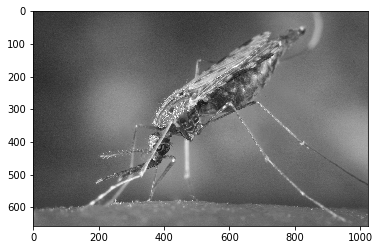

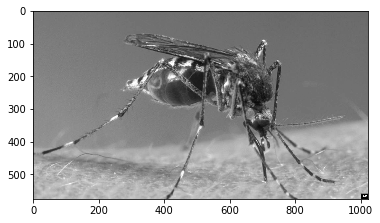

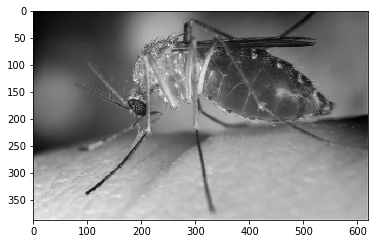

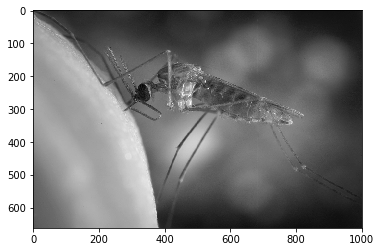

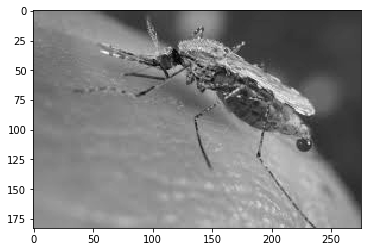

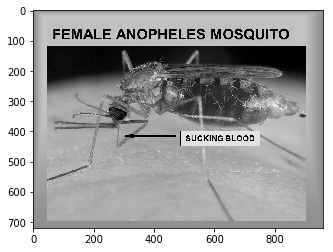

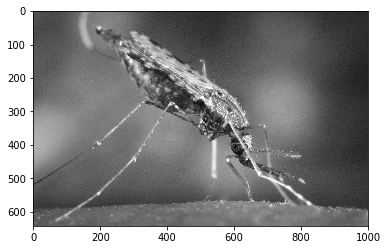

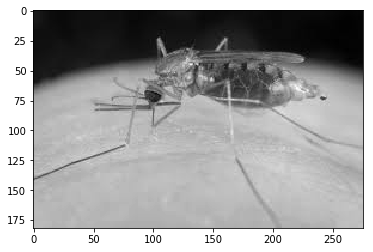

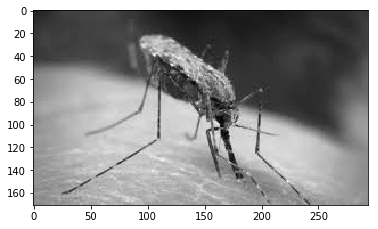

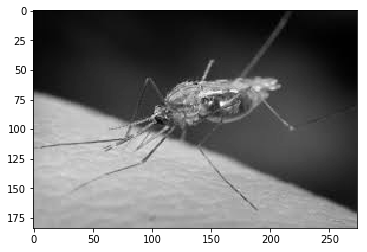

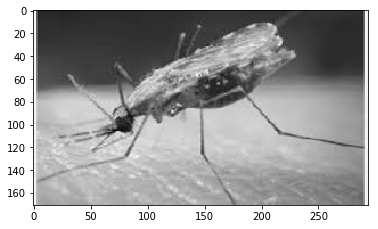

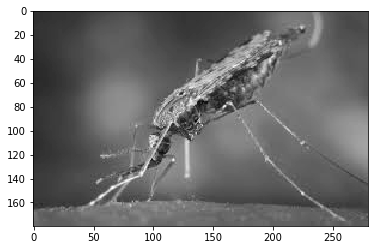

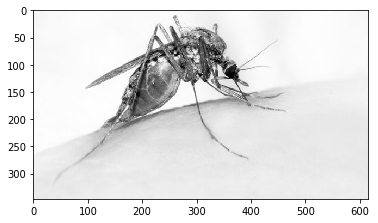

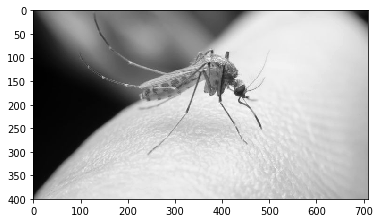

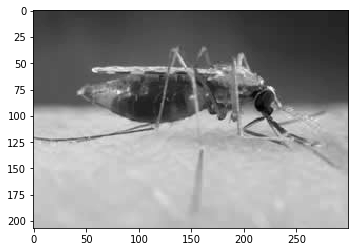

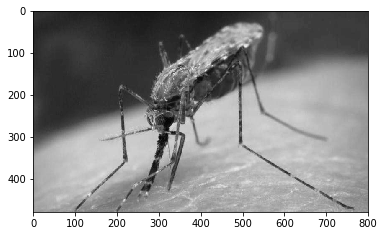

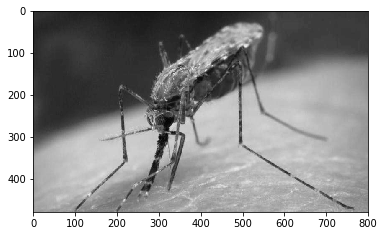

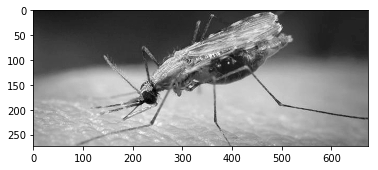

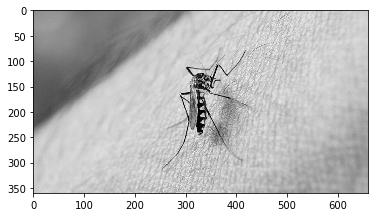

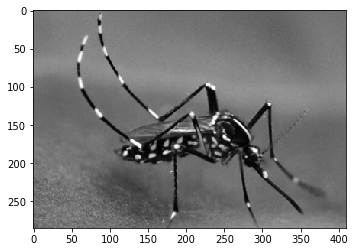

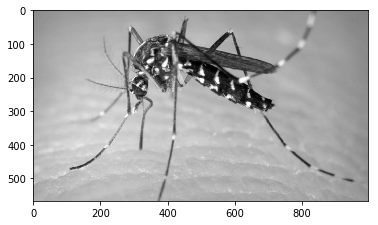

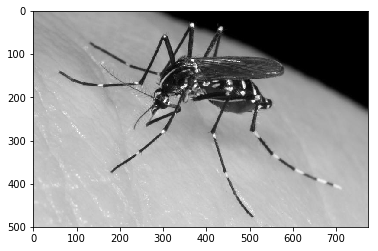

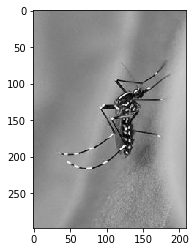

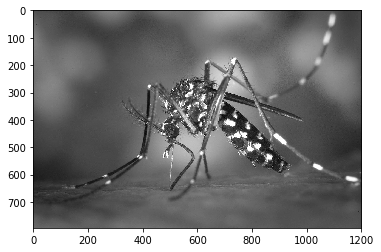

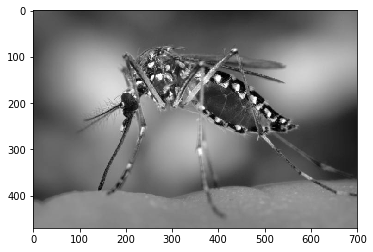

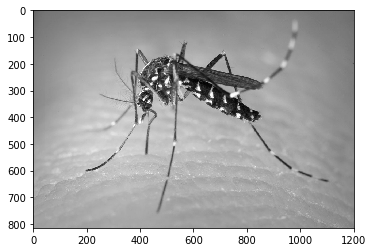

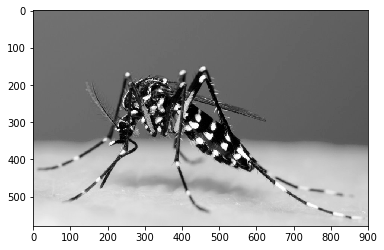

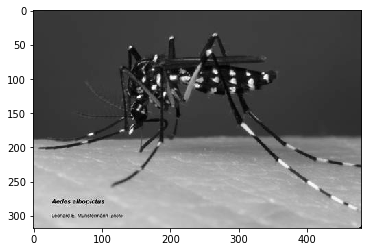

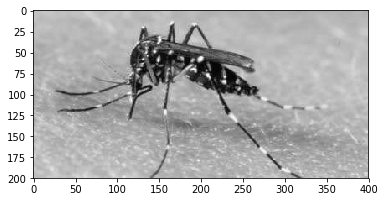

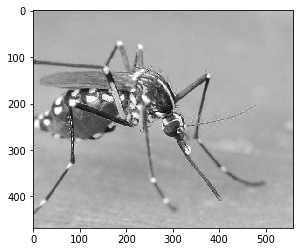

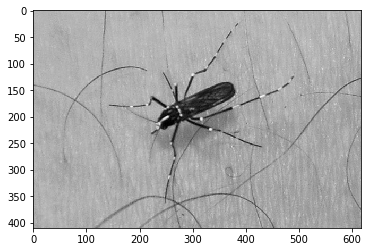

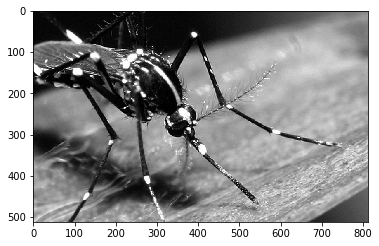

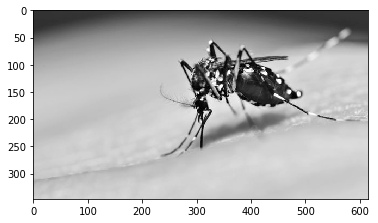

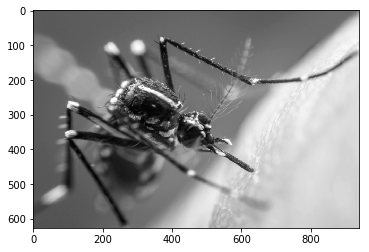

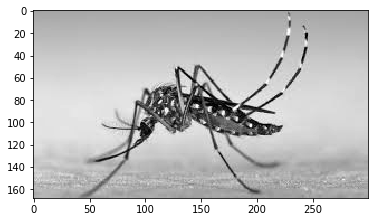

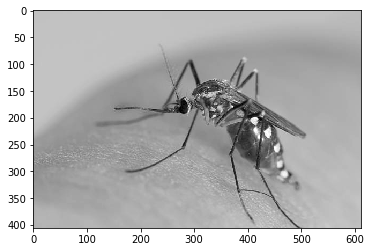

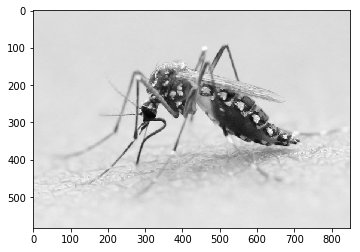

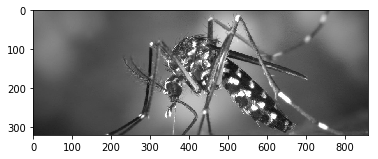

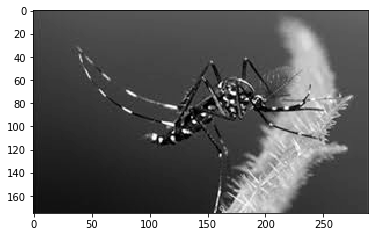

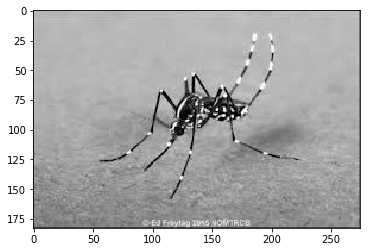

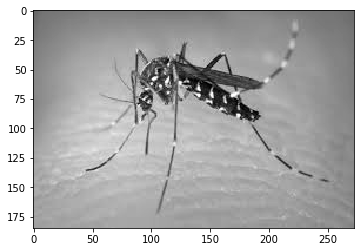

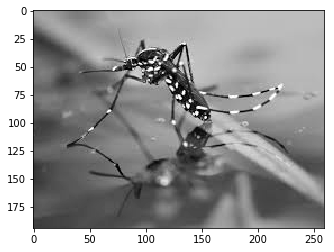

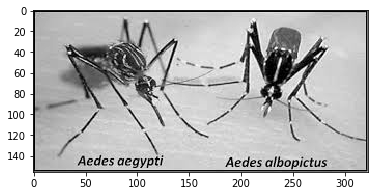

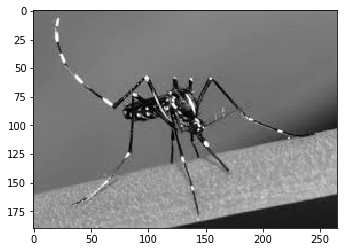

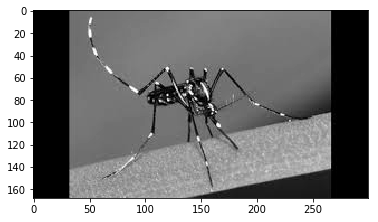

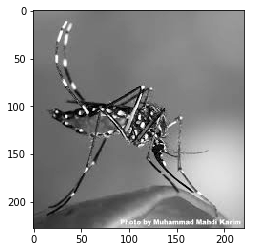

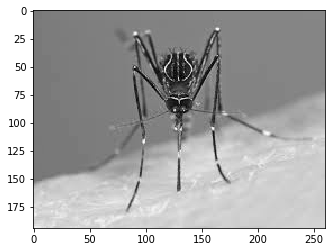

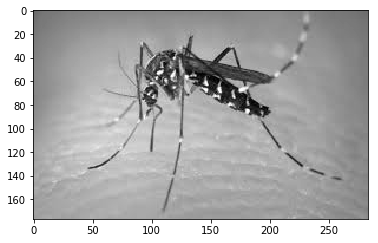

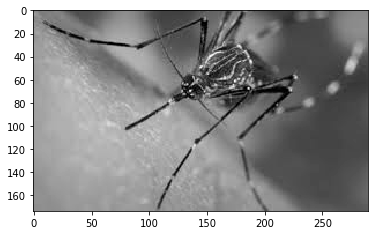

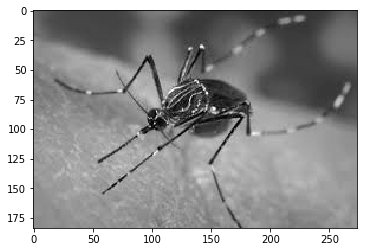

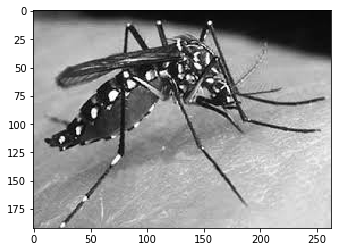

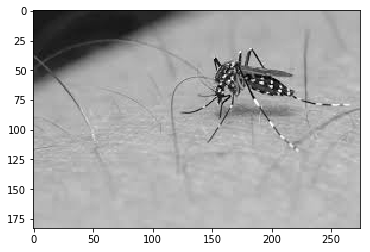

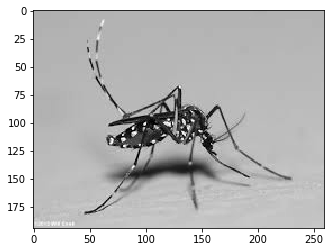

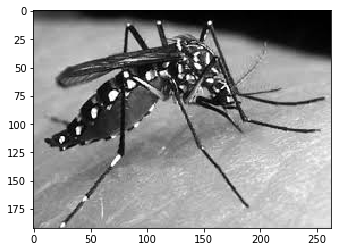

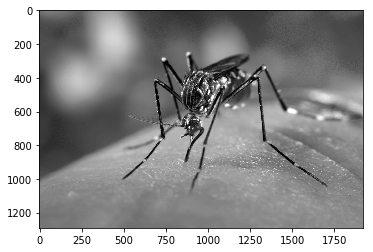

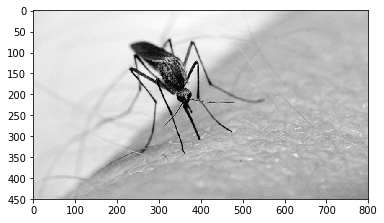

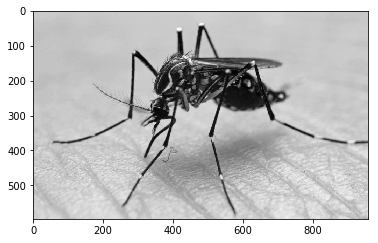

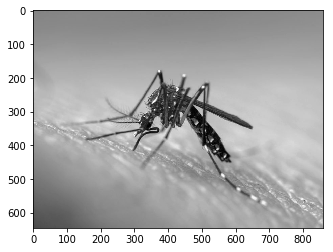

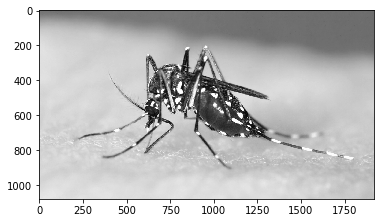

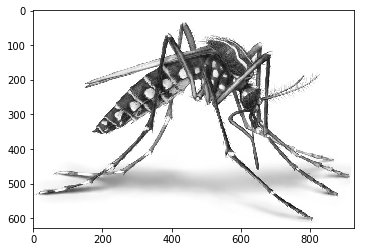

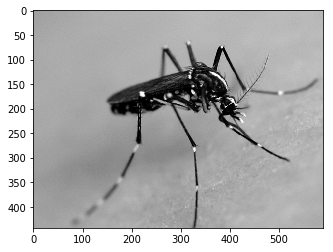

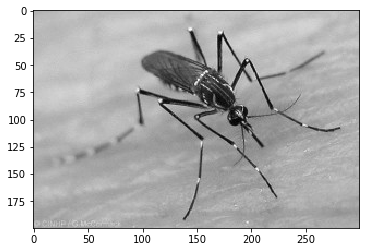

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/GRENTOR/Documents/imp py scr/datasets"

CATEGORIES = ["Mosquitoes-Species-Anopheles", "Mosquito-Species-Aedes", ]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show() 

In [8]:
cd 


C:\Users\GRENTOR


In [6]:
cd C:\Users\GRENTOR\Documents\imp py scr\datasets\Mosquitoes-Species-Anopheles

C:\Users\GRENTOR\Documents\imp py scr\datasets\Mosquitoes-Species-Anopheles


In [16]:
print(img_array)

[[174 174 175 ... 187 186 185]
 [175 175 175 ... 184 183 183]
 [177 176 176 ... 182 182 182]
 ...
 [163 182 191 ... 175 176 177]
 [165 168 179 ... 175 176 176]
 [164 158 167 ... 171 171 172]]


In [17]:
print(img_array.shape)

(200, 300)


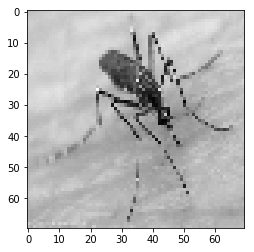

In [34]:
IMG_SIZE =70

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

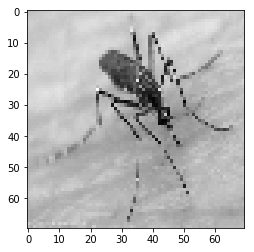

In [21]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [22]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 280.92it/s]


62


In [23]:
import random

random.shuffle(training_data)

In [24]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
0
1
1
1
1
1
0


In [25]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[193]
   [193]
   [193]
   ...
   [188]
   [188]
   [187]]

  [[193]
   [193]
   [193]
   ...
   [188]
   [187]
   [187]]

  [[193]
   [193]
   [193]
   ...
   [186]
   [187]
   [187]]

  ...

  [[179]
   [181]
   [181]
   ...
   [190]
   [189]
   [189]]

  [[178]
   [180]
   [181]
   ...
   [193]
   [189]
   [191]]

  [[178]
   [179]
   [181]
   ...
   [193]
   [191]
   [192]]]]


In [26]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [27]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

ModuleNotFoundError: No module named 'tensorflow'